<a href="https://colab.research.google.com/github/joaquinhojman/Entrenamieto_ECI_2020/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

url = 'https://raw.githubusercontent.com/joaquinhojman/Entrenamieto_ECI_2020/main/Entrenamieto_ECI_2020.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [9]:
#cantidad de columnas de la abse
len(df.columns)

52

In [11]:
#cantidad de filas de la base
len(df)

16947

In [12]:
#Estadisticas de la base
df.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.0,16947.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,0.0,5335.940225,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,0.0,3324.723809,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,0.0,2448.500000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,0.0,5306.000000,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,0.0,7698.000000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,12803.000000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [13]:
#informacion sobre las columnas de la base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [24]:
#Me interesa ver la distribucion de las ventas exitosas y fallidas en el tiempo
#empiezo con las ventas exitosas
df['Stage'] = df['Stage'].astype('category') #convierto la columna stage a tipo category
df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'])  #convierto la columna a date time
df_exito = df[['Stage','Planned_Delivery_Start_Date']] #dejo solo las columas que me interesan
df_exito = df_exito[df_exito['Stage'] == 'Closed Won']  #dejo solo los closed won
df_exito

,Stage,Planned_Delivery_Start_Date
1,Closed Won,2016-01-18
2,Closed Won,2016-01-25
7,Closed Won,2016-01-25
23,Closed Won,2016-01-09
63,Closed Won,2016-01-18
...,...,...
16937,Closed Won,2016-02-01
16939,Closed Won,2016-04-01
16942,Closed Won,2016-03-21
16943,Closed Won,2016-04-04


Text(0, 0.5, 'Densidad')

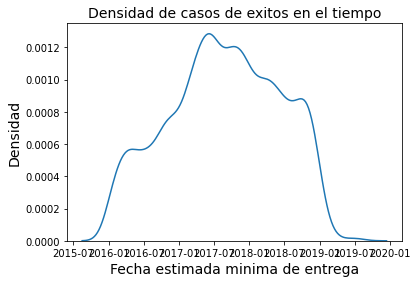

In [29]:
#Grafico los exitos en el tiempo

g = sns.kdeplot(df_exito["Planned_Delivery_Start_Date"])
g.set_title("Densidad de casos de exitos en el tiempo",fontsize=14)
g.set_xlabel("Fecha estimada minima de entrega",fontsize=14)
g.set_ylabel("Densidad",fontsize=14)

In [19]:
#Ahora buscamos ver las ventas fallidas en funcion del tiempo
df_fracaso = df[['Stage','Planned_Delivery_Start_Date']] #dejo solo las columas que me interesan
df_fracaso = df_fracaso[df_fracaso['Stage'] == 'Closed Lost']  #dejo solo los closed won
df_fracaso

,Stage,Planned_Delivery_Start_Date
0,Closed Lost,2016-05-01
3,Closed Lost,2018-02-01
4,Closed Lost,2018-02-01
5,Closed Lost,2018-02-01
6,Closed Lost,2017-02-01
...,...,...
16938,Closed Lost,2016-08-15
16940,Closed Lost,2016-10-03
16941,Closed Lost,2016-10-03
16945,Closed Lost,2016-04-25


Text(0, 0.5, 'Densidad')

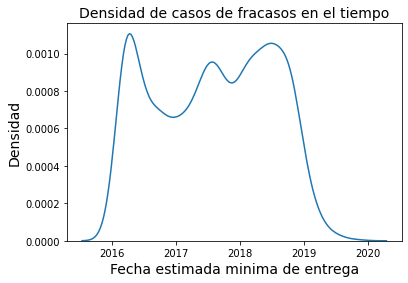

In [30]:
#Grafico los fracasos en el tiempo

g = sns.kdeplot(df_fracaso["Planned_Delivery_Start_Date"])
g.set_title("Densidad de casos de fracasos en el tiempo",fontsize=14)
g.set_xlabel("Fecha estimada minima de entrega",fontsize=14)
g.set_ylabel("Densidad",fontsize=14)